In [1]:
# Wenn eine Zeile mit "#" anfängt handelt es sich um einen Kommentar.
import numpy as np # Paket mit den wichtigsten mathematischen Funktionen und Funktionen für Arrays.
import matplotlib.pyplot as plt # Paket zum plotten.
from scipy.misc import derivative # Numerische Ableitung
import scipy.integrate # Numerische Integrale
from scipy.optimize import fsolve # Numerische Lösung von Gleichungssystemen, nur reelle Lösungen

## 1. Einfache Rechenbefehle
Shift + Enter zum Ausführen einer Zeile.

In [2]:
2+3

5

In [3]:
(2+3)*3

15

In [4]:
2**2

4

In [5]:
a = 102/9

In [6]:
print('{:.20f}'.format(a))

11.33333333333333392545


## 2. Mathematische Funktionen

In [7]:
np.exp(0)

1.0

In [8]:
np.sin(np.pi/2)

1.0

In [9]:
def f_linear(x):
    return 3*x + 4

def f_cubic(x):
    return x**3

def gauss(x, x0, sigma):
    return 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-x0)**2/(2*sigma**2))

## 3. Plots

#### 3.1 Plotten von einer Liste

In [10]:
someList = np.array([[2, 3], [3, 5], [5, 7], [7, 11], [11, 13], [13, 17], [17, 19]])
someList

array([[ 2,  3],
       [ 3,  5],
       [ 5,  7],
       [ 7, 11],
       [11, 13],
       [13, 17],
       [17, 19]])

In [11]:
# An die nte Zeile von someList kommt ihr mit someList[n]. Vorsicht, es geht bei 0 los.
# An die nte Spalte von someList kommt ihr mit someList[:,n].
print(someList[2])
print(someList[:,1])

[5 7]
[ 3  5  7 11 13 17 19]


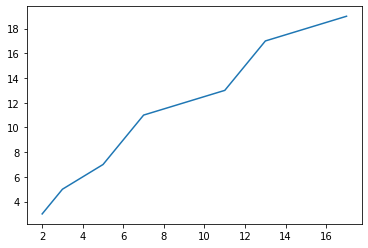

In [12]:
# Wenn ihr innerhalb der Klammern einer Funktion shift+tab drückt öffnet sich die Dokumentation der Funktion
plt.plot(someList[:,0], someList[:,1])

#### 3.2 Plotten von Funktionen

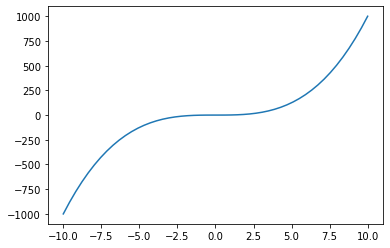

In [13]:
x = np.linspace(-10, 10)
y = f_cubic(x)
plt.plot(x, y)

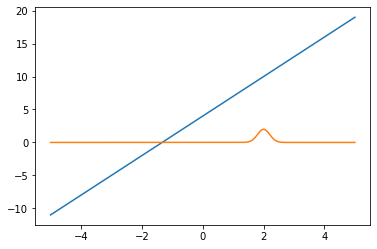

In [14]:
x = np.linspace(-5, +5, 1000) # Die dritte Zahl gibt die Anzahl der Punkte im Intervall an (shift + tab)
y_linear = f_linear(x)
y_gauss = gauss(x, 2, 0.2)

plt.plot(x, y_linear)
plt.plot(x, y_gauss)

#### 3.3 Dateien einlesen

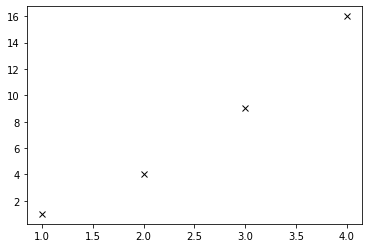

In [15]:
data = np.loadtxt('daten.csv', skiprows=1, delimiter=',')
# skiprows=1 überspringt die erste Zeile mit "x, y"
# delimiter=',' sagt, dass die Zahlen in den Zeilen per Komma getrennt sind
plt.plot(data[:,0], data[:,1], 'kx')

## 4. Fitten

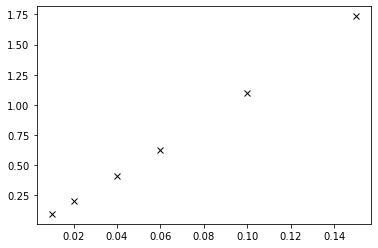

In [16]:
data = np.array([[0.01, 0.095], [0.02, 0.202], [0.04, 0.413], [0.06, 0.629], [0.10, 1.101], [0.15, 1.735]])
plt.plot(data[:,0], data[:,1], 'kx')

#### 4.1 Polynome an Liste fitten

In [17]:
poly_lin = np.polyfit(data[:,0], data[:,1], deg=1) # Ordnungen 0 und 1
poly_quad = np.polyfit(data[:,0], data[:,1], deg=2) # Ordnungen 0 bis 2

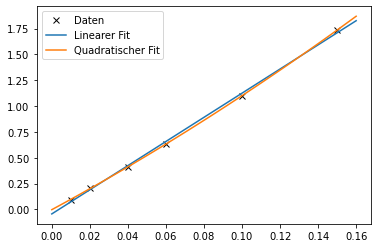

In [18]:
x_poly = np.linspace(0, 0.16)
y_poly_lin = np.poly1d(poly_lin)(x_poly)
y_poly_quad = np.poly1d(poly_quad)(x_poly)

plt.plot(data[:,0], data[:,1], 'kx', label='Daten')
plt.plot(x_poly, y_poly_lin, label='Linearer Fit')
plt.plot(x_poly, y_poly_quad, label='Quadratischer Fit')
plt.legend()

## 5. Ableitungen, Integrale, Differentialgleichungen

#### 5.1 Numerische Ableitungen

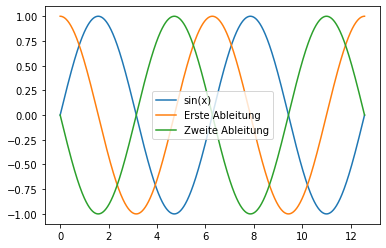

In [19]:
x = np.linspace(0, np.pi*4, 1000)
y = np.sin(x)
first_derivative = derivative(np.sin, x, dx=0.01, n=1)
second_derivative = derivative(np.sin, x, dx=0.01, n=2)

plt.plot(x, y, label='sin(x)')
plt.plot(x, first_derivative, label='Erste Ableitung')
plt.plot(x, second_derivative, label='Zweite Ableitung')
plt.legend()

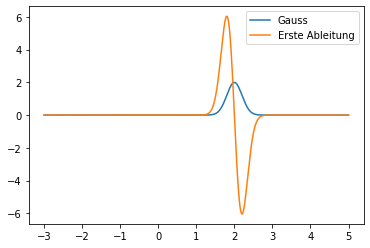

In [20]:
mu = 2
sigma = 0.2

x = np.linspace(-3, 5, 1000)
y = gauss(x, mu, sigma)
first_derivative = derivative(gauss, x, dx=0.01, n=1, args=(mu, sigma))

plt.plot(x, y, label='Gauss')
plt.plot(x, first_derivative, label='Erste Ableitung')
plt.legend()

#### 5.2 Numerische Integration

In [21]:
scipy.integrate.quad(f_linear, 0, 2)
# Der zweite Wert ist die numerische Genauigkeit.

(14.0, 1.5543122344752192e-13)

In [22]:
mu = 2
sigma = 0.2
scipy.integrate.quad(gauss, -np.inf, +np.inf, args=(mu, sigma))
# Das Integral ist wie für die normierte Gaußverteilung erwartet 1.

(1.0000000000000002, 5.890799905847284e-09)

#### 5.3 Gleichungssysteme lösen

In [23]:
fsolve(f_linear, -1) # Das zweite Argument ist ein Anfangswert zum "raten".

array([-1.33333333])

#### 5.4 Differentialgleichung
Harmonic oscillator with friction, second order ordinary differential equation    
```
x''(t) + k*x'(t) + w^2*x(t) = 0
```
where `k` is the friction and `w` is the (angular) oscillator frequency.    
`x`: Position    
`x'`: Velocity -> `v`    
`x''`: Acceleration -> `a`    

The trick is to write the ODE as two first order differential equations
```
x'(t) = v(t)
v'(t) = -k*v(t) - w^2*x(t)
```

In [35]:
def harmOscODE(state,t,params):
    # Input vector reflecting current state of the system (position,velocity)
    x,v=state

    # environmental variables (friction, oscillator frequency)
    k,w=params

    # create output vector [x'(t)= v(t), v'(t)= - k* v(t)-w^2*x(t)]
    result = [v,  -k*v-w**2*x]

    return result

In [36]:
# define array of sample times
t = np.linspace(0, 20, 1000) # 0-20 seconds, 1000 steps

# environmental variables
k = 0.4
w = 2*np.pi # in rad/s
# pack into a vector
p = k, w

# start parameters
x0 = -5.0 # initial position in m
v0 = 0.0 # initial velocity in m/s
# pack into vector
values_init = x0, v0

In [37]:
# Here the mathematics happens. [scipy.integrate.odeint] solves a system of ordinary differential equations given by our function [harmOscODE]
solution = scipy.integrate.odeint(harmOscODE, values_init, t, args=(p,))
x, v = solution.T # transposes outputvector to directly have the value arrays of x and v available.

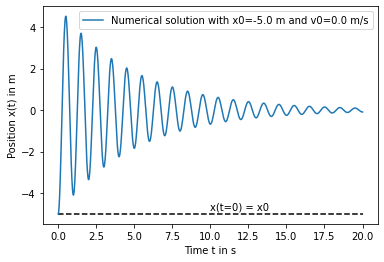

In [38]:
fontsize_label = 10
fontsize_ticks = 10

label = "Numerical solution with x0={:0.1f} m and v0={:0.1f} m/s".format(x0, v0) # For [%0.1f] see format string in python
plt.xlabel("Time t in s", fontsize=fontsize_label)
plt.ylabel("Position x(t) in m", fontsize=fontsize_label)

# plot
plt.plot(t, x, label=label)
# Create horizontal dashed line at [x0] from minimum of [t] to maximum of [t]
plt.hlines(x0, np.amin(t), np.amax(t), linestyles="dashed", color="black")
plt.text(np.mean(t), x0+0.2, 'x(t=0) = x0')

# Set tick size
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

# Set legend
plt.legend(loc="upper right", fontsize=fontsize_label)

# Save and show plot
plt.savefig("HarmOscSol.pdf") # Create scalable vector graphic. Best for thesis like Bachelor, Master, PhD!
#plt.savefig("HarmOscSol.svg") # Alternative scalable vector graphic *.svg